In [3]:
# Load the dataset and preprocess it
import pandas as pd

In [4]:
# Load the dataset
terror = pd.read_csv('Resources/Terrorism_Dataset.csv', encoding='ISO-8859-1', low_memory=False)
terror.head()

,iyear,imonth,iday,country,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN


In [5]:
# Rename columns for better readability
terror.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country': 'Country', 
    'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 
    'nkill': 'Killed', 'nwound': 'Wounded', 'gname': 'Group', 
    'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'
}, inplace=True)

In [6]:
# Select relevant columns
terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 
                 'AttackType', 'Killed', 'Wounded', 'Target', 'Group', 'Target_type', 
                 'Weapon_type', 'Motive']]
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
len(terror)

181691

In [8]:
terror.loc[:, 'Casualties'] = terror['Killed'] + terror['Wounded']
terror.loc[:, 'Casualties']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Casualties, Length: 181691, dtype: float64

In [9]:
# Iterate over each column and print its length
for column in terror:
    column_length = len(terror[column])
    print(f"Length of column '{column}': {column_length}")

Length of column 'Year': 181691
Length of column 'Month': 181691
Length of column 'Day': 181691
Length of column 'Country': 181691
Length of column 'Region': 181691
Length of column 'city': 181691
Length of column 'latitude': 181691
Length of column 'longitude': 181691
Length of column 'AttackType': 181691
Length of column 'Killed': 181691
Length of column 'Wounded': 181691
Length of column 'Target': 181691
Length of column 'Group': 181691
Length of column 'Target_type': 181691
Length of column 'Weapon_type': 181691
Length of column 'Motive': 181691
Length of column 'Casualties': 181691


Question-1

Incident Frequency Analysis:

In [10]:
# Check for any inconsistencies or invalid values in the date columns
terror['Year'].unique()
terror['Month'].unique()
terror['Day'].unique()


array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

In [11]:
# Concatenate 'Year', 'Month', and 'Day' columns into a single date column
terror['Date'] = terror['Year'].astype(str) + '-' + terror['Month'].astype(str).str.zfill(2) + '-' + terror['Day'].astype(str).str.zfill(2)
terror['Date'] 

0         1970-07-02
1         1970-00-00
2         1970-01-00
3         1970-01-00
4         1970-01-00
             ...    
181686    2017-12-31
181687    2017-12-31
181688    2017-12-31
181689    2017-12-31
181690    2017-12-31
Name: Date, Length: 181691, dtype: object

In [12]:
# Convert the new date column into a datetime format
terror['Date'] = pd.to_datetime(terror['Date'], errors='coerce')

In [13]:
terror['Date']

0        1970-07-02
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
181686   2017-12-31
181687   2017-12-31
181688   2017-12-31
181689   2017-12-31
181690   2017-12-31
Name: Date, Length: 181691, dtype: datetime64[ns]

In [14]:
# Drop rows with NaT (Not a Time) values, which indicate conversion errors
terror.dropna(subset=['Date'], inplace=True)

In [15]:
# Group by date and count the number of incidents for each date
incident_frequency = terror['Date'].value_counts().sort_index()
incident_frequency 

Date
1970-01-01     2
1970-01-02     3
1970-01-03     1
1970-01-06     1
1970-01-08     1
              ..
2017-12-27    24
2017-12-28    40
2017-12-29    15
2017-12-30    24
2017-12-31    25
Name: count, Length: 16070, dtype: int64

In [16]:
# Iterate over each column and print its length
for column in terror.columns:
    column_length = len(terror[column])
    print(f"Length of column '{column}': {column_length}")

Length of column 'Year': 180800
Length of column 'Month': 180800
Length of column 'Day': 180800
Length of column 'Country': 180800
Length of column 'Region': 180800
Length of column 'city': 180800
Length of column 'latitude': 180800
Length of column 'longitude': 180800
Length of column 'AttackType': 180800
Length of column 'Killed': 180800
Length of column 'Wounded': 180800
Length of column 'Target': 180800
Length of column 'Group': 180800
Length of column 'Target_type': 180800
Length of column 'Weapon_type': 180800
Length of column 'Motive': 180800
Length of column 'Casualties': 180800
Length of column 'Date': 180800


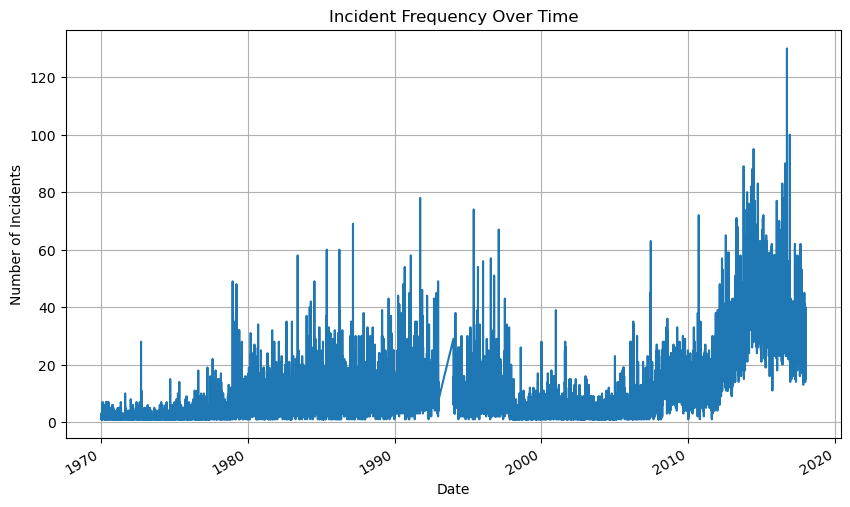

In [17]:
# Plot the incident frequency over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
incident_frequency.plot(kind='line')
plt.title('Incident Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

Casualty Rate Examination:

In [18]:
# Calculate Casualty Rates
terror['Casualty_Rate'] = (terror['Killed'] + terror['Wounded']) / (terror['Killed'] + terror['Wounded'] + 1)
terror['Casualty_Rate'] 

0         0.50
5         0.00
6         0.00
7         0.00
8         0.00
          ... 
181686    0.75
181687    0.90
181688    0.00
181689    0.00
181690    0.00
Name: Casualty_Rate, Length: 180800, dtype: float64

In [19]:
# Aggregate by Country
casualty_rates_by_country = terror.groupby('Country')['Casualty_Rate'].mean().sort_values(ascending=False)[:10]
casualty_rates_by_country

Country
South Vietnam    0.987805
St. Lucia        0.933333
International    0.928571
North Korea      0.875000
Vatican City     0.750000
Rwanda           0.725551
Uzbekistan       0.693250
Niger            0.673424
Turkmenistan     0.666667
Bhutan           0.664762
Name: Casualty_Rate, dtype: float64

In [20]:
import plotly.graph_objs as go

# Create a trace for the bar chart
bar_trace = go.Bar(x=casualty_rates_by_country.index,
                   y=casualty_rates_by_country.values,
                   marker_color='skyblue')

# Create the layout for the bar chart
layout = go.Layout(title='Interactive Bar Chart of Casualty Rates by Country',
                   xaxis=dict(title='Country'),
                   yaxis=dict(title='Mean Casualty Rate'))

# Create the figure object
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive bar chart
fig.show()

Threat Level Assessment:

In [21]:
# Select relevant columns
terror_threat = terror[['Country', 'Group']]

# Filter out rows where the Group column is not null (i.e., there is a known terrorist group)
terrorist_groups = terror_threat[terror_threat['Group'].notnull()]

# Group by country and count the number of unique terrorist groups operating in each country
terrorist_groups_count = terrorist_groups.groupby('Country')['Group'].nunique().sort_values(ascending=False)

# Display the top 10 countries with the highest number of unique terrorist groups
print("Top 10 Countries with Highest Number of Unique Terrorist Groups:")
print(terrorist_groups_count.head(10))

Top 10 Countries with Highest Number of Unique Terrorist Groups:
Country
India             300
United States     232
Italy             222
France            206
Greece            169
Lebanon           165
Pakistan          146
United Kingdom    109
Colombia          107
Iraq               98
Name: Group, dtype: int64


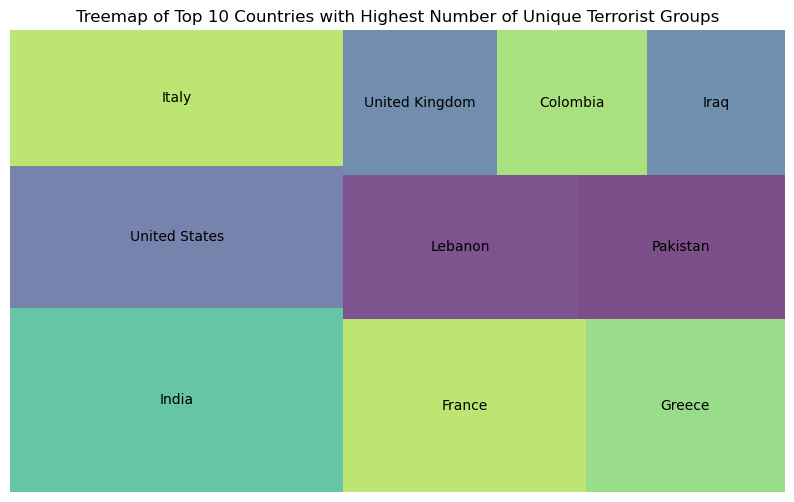

In [41]:
import squarify
import matplotlib.pyplot as plt

# Generate data
data = terrorist_groups_count.head(10)

# Plot treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=data.values, label=data.index, alpha=0.7)
plt.axis('off')
plt.title('Treemap of Top 10 Countries with Highest Number of Unique Terrorist Groups')
plt.show()


C:\Users\mistr184\AppData\Local\Temp\ipykernel_30888\222874140.py:36: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



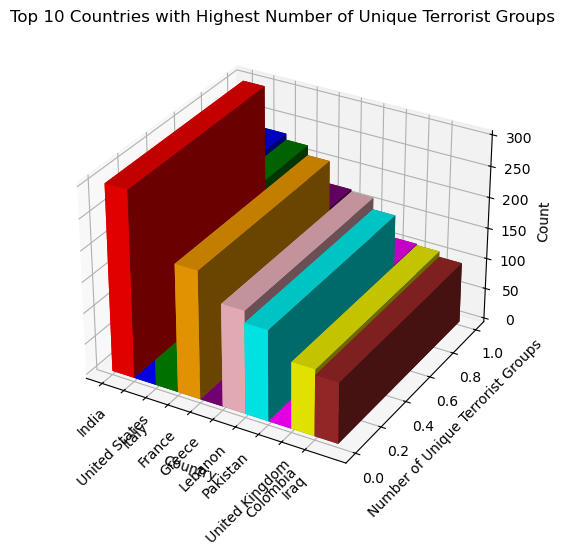

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
countries = terrorist_groups_count.head(10).index
groups = terrorist_groups_count.head(10).values

# Define colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown']

# Create a figure and axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define bar parameters
xpos = np.arange(len(countries))
ypos = np.zeros(len(countries))
zpos = np.zeros(len(countries))
dx = np.ones(len(countries))
dy = np.ones(len(countries))
dz = groups

# Plot the bars with different colors
for i in range(len(countries)):
    ax.bar3d(xpos[i], ypos[i], zpos[i], dx[i], dy[i], dz[i], color=colors[i])

# Set labels and title
ax.set_xticks(xpos)
ax.set_xticklabels(countries, rotation=45)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Unique Terrorist Groups')
ax.set_zlabel('Count')
ax.set_title('Top 10 Countries with Highest Number of Unique Terrorist Groups')

# Show the plot
plt.tight_layout()
plt.show()



In [25]:
import folium

# Create a map centered at a specific location
map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each country with the number of unique terrorist groups
for country, groups in zip(terrorist_groups_count.head(500).index, terrorist_groups_count.head(500).values):
    folium.Marker(location=[0, 0], popup=f"{country}: {groups}", tooltip=country).add_to(map)

# Display the map
map


In [26]:
terror.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Group',
       'Target_type', 'Weapon_type', 'Motive', 'Casualties', 'Date',
       'Casualty_Rate'],
      dtype='object')

Impact on Tourism 

In [27]:
# Step 1: Load the tourism dataset
tourism = pd.read_csv('Resources/tourism.csv')

# Renaming the 'Country' column to "Country"
tourism.rename(columns={'country': 'Country'}, inplace=True)


In [28]:
# Step 2: Merge the tourism dataset with the terrorism dataset on the 'Country' column
merged_data = pd.merge(terror, tourism, on='Country', how='left')

In [29]:
# Step 3: Clean up the merged dataset
# Check for missing values
print("Missing values in merged dataset:")
print(merged_data.isnull().sum())

Missing values in merged dataset:
Year                         0
Month                        0
Day                          0
Country                      0
Region                       0
city                       432
latitude                  4469
longitude                 4470
AttackType                   0
Killed                   10151
Wounded                  16128
Target                     633
Group                        0
Target_type                  0
Weapon_type                  0
Motive                  130527
Casualties               16683
Date                         0
Casualty_Rate            16683
tourists_in_millions    151476
receipts_in_billions    151476
receipts_per_tourist    151476
percentage_of_gdp       151476
dtype: int64


In [30]:
# Iterate over each column and print its length
for column in terror.columns:
    column_length = len(terror[column])
    print(f"Length of column '{column}': {column_length}")

Length of column 'Year': 180800
Length of column 'Month': 180800
Length of column 'Day': 180800
Length of column 'Country': 180800
Length of column 'Region': 180800
Length of column 'city': 180800
Length of column 'latitude': 180800
Length of column 'longitude': 180800
Length of column 'AttackType': 180800
Length of column 'Killed': 180800
Length of column 'Wounded': 180800
Length of column 'Target': 180800
Length of column 'Group': 180800
Length of column 'Target_type': 180800
Length of column 'Weapon_type': 180800
Length of column 'Motive': 180800
Length of column 'Casualties': 180800
Length of column 'Date': 180800
Length of column 'Casualty_Rate': 180800


In [31]:
# Remove rows with missing values in 'tourists_in_millions' column
merged_data.dropna(subset=['tourists_in_millions'], inplace=True)

In [32]:
merged_data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Target_type,Weapon_type,Motive,Casualties,Date,Casualty_Rate,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
1,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,...,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,1970-01-01,0.0,45.0,84.21,1870.0,0.4
3,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,...,Utilities,Explosives,NaN,0.0,1970-01-02,0.0,45.0,84.21,1870.0,0.4
4,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,...,Military,Incendiary,To protest the War in Vietnam and the draft,0.0,1970-01-02,0.0,45.0,84.21,1870.0,0.4
5,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,...,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0,1970-01-03,0.0,45.0,84.21,1870.0,0.4
6,1970,1,1,United States,North America,Baraboo,43.468500,-89.744299,Bombing/Explosion,0.0,...,Military,Explosives,NaN,0.0,1970-01-01,0.0,45.0,84.21,1870.0,0.4


In [33]:
# Step 4: Analyze the impact of terrorism on tourism
# Group by country and calculate the total number of terrorist incidents and total tourists
tourism_impact = merged_data.groupby('Country').agg({'Year': 'count', 'tourists_in_millions': 'mean'}).reset_index()


In [34]:
tourism_impact.head()

,Country,Year,tourists_in_millions
0,Albania,80,2.7
1,Australia,111,1.8
2,Austria,114,15.1
3,Belarus,13,3.6
4,Belgium,152,2.6


In [35]:

# Calculate the correlation between the number of terrorist incidents and tourists
correlation = tourism_impact['Year'].corr(tourism_impact['tourists_in_millions'])
correlation

0.27199630050349566

In [36]:
tourism_impact.rename(columns={'Year': 'Total_Incidents'}, inplace=True)
tourism_impact.head()

,Country,Total_Incidents,tourists_in_millions
0,Albania,80,2.7
1,Australia,111,1.8
2,Austria,114,15.1
3,Belarus,13,3.6
4,Belgium,152,2.6


In [37]:

# Finding the country with the highest impact on tourism
country_highest_impact = tourism_impact.loc[tourism_impact['tourists_in_millions'].idxmax()]

# Finding the country with the lowest impact on tourism
country_lowest_impact = tourism_impact.loc[tourism_impact['tourists_in_millions'].idxmin()]

# Calculate the difference in tourism impact
difference = country_highest_impact['tourists_in_millions'] - country_lowest_impact['tourists_in_millions']

print("Country with the highest impact on tourism:", country_highest_impact['Country'])
print("Country with the lowest impact on tourism:", country_lowest_impact['Country'])
print("Difference in tourism impact:", difference)

Country with the highest impact on tourism: France
Country with the lowest impact on tourism: Moldova
Difference in tourism impact: 117.1


In [38]:
tourism_impact.dtypes

Country                  object
Total_Incidents           int64
tourists_in_millions    float64
dtype: object

In [39]:
import plotly.express as px

# Plot the scatter plot on a geographical map
fig = px.scatter_geo(tourism_impact, 
                     locations='Country',  # 'Country' column as location
                     locationmode='country names',  # Interpret locations as country names
                     color='tourists_in_millions',  # Color points based on tourists in millions
                     hover_name='Country',  # Display country names on hover
                     size='Total_Incidents',  # Size points based on total incidents
                     projection='natural earth',  # Map projection
                     title='Terrorist Incidents vs. Tourists by Country'
                    )

# Show the plot
fig.show()
